In [1]:
!wget https://huggingface.co/stable-diffusion-v1-5/stable-diffusion-v1-5/resolve/main/v1-5-pruned-emaonly.ckpt
!wget https://huggingface.co/stable-diffusion-v1-5/stable-diffusion-v1-5/resolve/main/tokenizer/merges.txt
!wget https://huggingface.co/stable-diffusion-v1-5/stable-diffusion-v1-5/resolve/main/tokenizer/vocab.json
!wget https://hips.hearstapps.com/hmg-prod/images/dog-puppy-on-garden-royalty-free-image-1586966191.jpg?crop=0.752xw:1.00xh;0.175xw,0&resize=1200:*  -O dog.jpg

--2024-11-15 14:52:10--  https://huggingface.co/stable-diffusion-v1-5/stable-diffusion-v1-5/resolve/main/v1-5-pruned-emaonly.ckpt
Resolving huggingface.co (huggingface.co)... 18.239.50.16, 18.239.50.103, 18.239.50.49, ...
Connecting to huggingface.co (huggingface.co)|18.239.50.16|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.hf.co/repos/66/6f/666f465fa70158515404e8de2c6bc6fe2f90c46f9296293aa14daededeb32c52/cc6cb27103417325ff94f52b7a5d2dde45a7515b25c255d8e396c90014281516?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27v1-5-pruned-emaonly.ckpt%3B+filename%3D%22v1-5-pruned-emaonly.ckpt%22%3B&Expires=1731940138&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTczMTk0MDEzOH19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5oZi5jby9yZXBvcy82Ni82Zi82NjZmNDY1ZmE3MDE1ODUxNTQwNGU4ZGUyYzZiYzZmZTJmOTBjNDZmOTI5NjI5M2FhMTRkYWVkZWRlYjMyYzUyL2NjNmNiMjcxMDM0MTczMjVmZjk0ZjUyYjdhNWQyZGRlNDVhNzUxNWIyNWMyNTVkOGUzOTZ

In [2]:
!pip install lightning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 811.0/811.0 kB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 926.4/926.4 kB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 49.5 MB/s eta 0:00:00


In [12]:
!git clone https://github.com/JAZ201107/StableDiffusion_Pytorch.git

remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 4 (delta 3), reused 4 (delta 3), pack-reused 0 (from 0)
Unpacking objects: 100% (4/4), 364 bytes | 364.00 KiB/s, done.
From https://github.com/JAZ201107/StableDiffusion_Pytorch
 * branch            HEAD       -> FETCH_HEAD
Updating a59ce12..f6492d4
Fast-forward
 model/attention.py | 2 +-
 1 file changed, 1 insertion(+), 1 deletion(-)


In [1]:
%cd /content/StableDiffusion_Pytorch

/content/StableDiffusion_Pytorch


In [ ]:
import model_loader
import pipeline
from PIL import Image
from pathlib import Path
from transformers import CLIPTokenizer
import torch

In [ ]:
DEVICE = 'cpu'
ALLOW_CUDA = True

if torch.cuda.is_available() and ALLOW_CUDA:
    DEVICE = "cuda"

print(f"Using device: {DEVICE}")

Using device: cuda


In [4]:
tokenizer = CLIPTokenizer("/content/vocab.json", merges_file="/content/merges.txt")

In [5]:
model_file = "/content/v1-5-pruned-emaonly.ckpt"
models = model_loader.preload_models_from_standard_weights(model_file, DEVICE)

In [6]:
## TEXT TO IMAGE

# prompt = "A dog with sunglasses, wearing comfy hat, looking at camera, highly detailed, ultra sharp, cinematic, 100mm lens, 8k resolution."
prompt = "A cat stretching on the floor, highly detailed, ultra sharp, cinematic, 100mm lens, 8k resolution."
uncond_prompt = ""  # Also known as negative prompt
do_cfg = True
cfg_scale = 8  # min: 1, max: 14

In [7]:
## IMAGE TO IMAGE

input_image = None
# Comment to disable image to image
image_path = "/content/dog.jpg"
# input_image = Image.open(image_path)
# Higher values means more noise will be added to the input image, so the result will further from the input image.
# Lower values means less noise is added to the input image, so output will be closer to the input image.
strength = 0.9


100%|██████████| 50/50 [00:29<00:00,  1.69it/s]


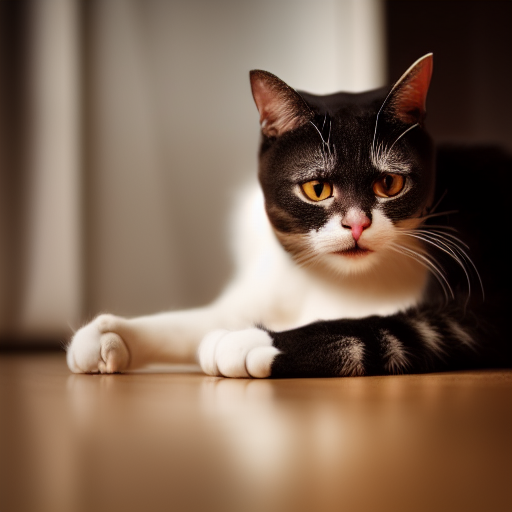

In [8]:
## SAMPLER

sampler = "ddpm"
num_inference_steps = 50
seed = 42

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
)

# Combine the input image and the output image into a single image.
Image.fromarray(output_image)